## PCA(주성분 분석)  
--- 
- 전체 특성(Feature)에서 주요 특성 압축/융합하는 비지도 학습
- fit() + transfrom() 2단계 거쳐 주성분 분석

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

### [1] 데이터 준비

In [2]:
X, y = load_iris(return_X_y=True, as_frame = True)

In [3]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

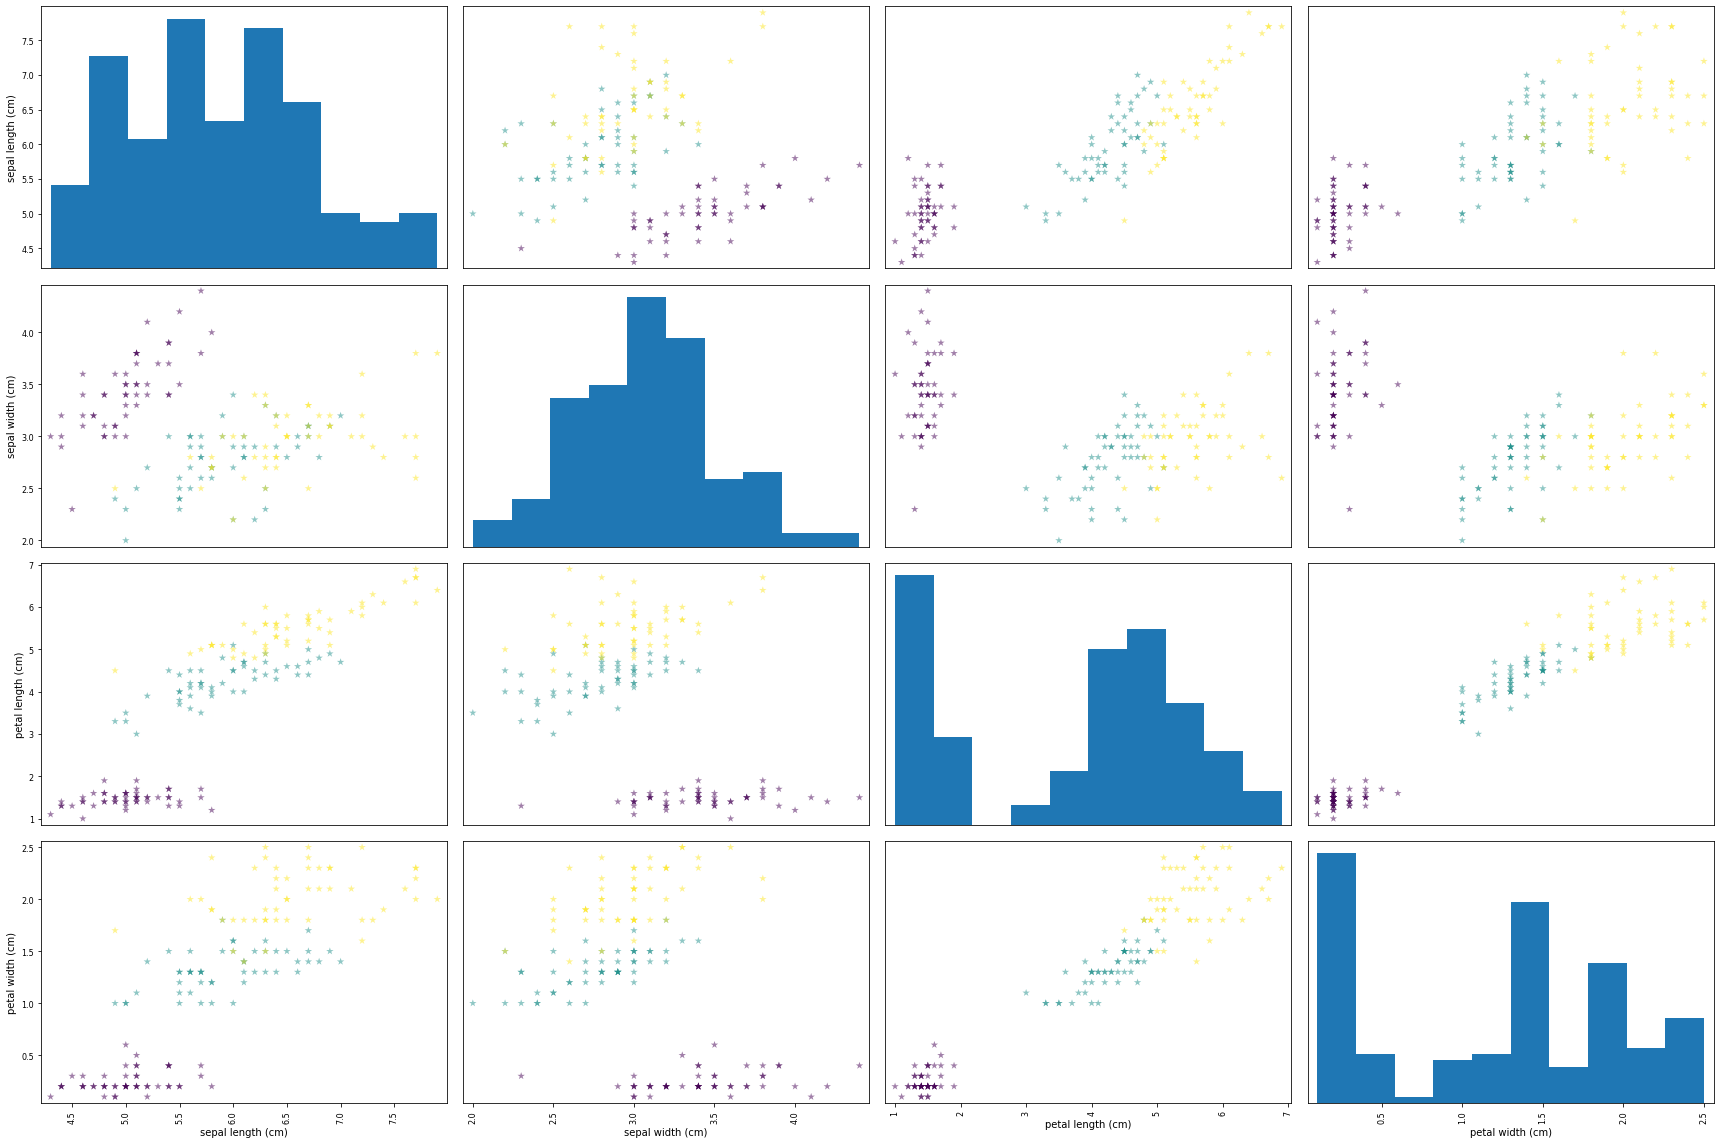

In [12]:
scatter_matrix(X, figsize = (24, 16), c=y, s= 60, marker='*')
plt.tight_layout()